# Spam Detection using Machine Learning

### Importing the dataset

In [6]:
import pandas as pd

# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table('smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Output printing out first 5 columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### As we can see 'ham' represent Not Spam and spam represent spam

## Data Pre-Processing

### Converting the ham to 0 and spam to 1

In [7]:
df['label'] = df.label.map( {'ham':0, 'spam':1})

In [8]:
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Creating Bag of Words - 


The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. 

we will covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrance of each word or token in that document.



For example: 

Lets say we have 4 documents as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

<img src="images/countvectorizer.png" height="542" width="542">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.


### Creating Bag of Words using sklearn CountVectorize()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

### Spilitting the dataset for cross-validation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


### Converting training_data and testing_data to Bag of Words

In [11]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Training 

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


clf_A = MultinomialNB()
clf_B = tree.DecisionTreeClassifier()
clf_C = LinearSVC()
clf_D = LogisticRegression()

clf_A.fit(training_data, y_train)
clf_B.fit(training_data, y_train)
clf_C.fit(training_data, y_train)
clf_D.fit(training_data, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions of testing data from different Trained models

In [13]:
predictions_A = clf_A.predict(testing_data)
predictions_B = clf_B.predict(testing_data)
predictions_C = clf_C.predict(testing_data)
predictions_D = clf_D.predict(testing_data)

### Calculting different evaluation scores (accuracy, precision, recall, f1 score)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = [predictions_A, predictions_B, predictions_C, predictions_D]

scores = []
for i in pred:
    scores.append([accuracy_score(y_test, i), precision_score(y_test, i), recall_score(y_test, i), f1_score(y_test, i)])


# Visualization

## Ploting the results

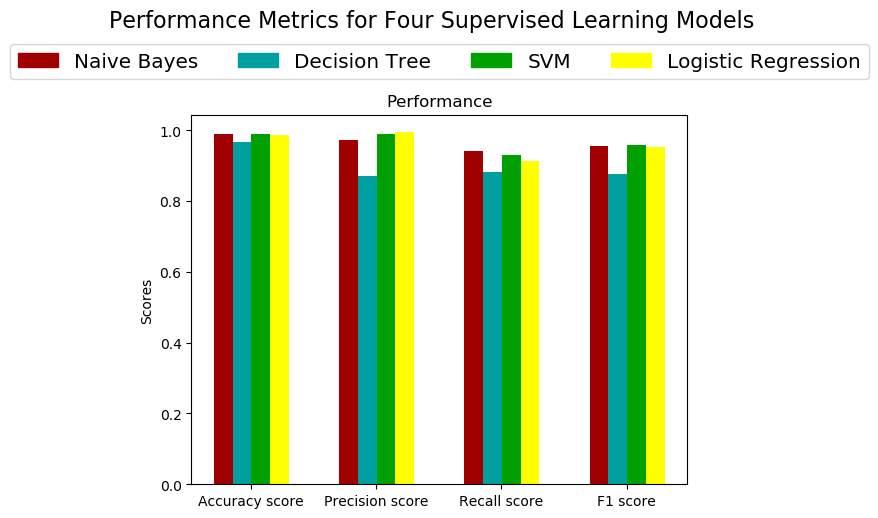

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00']
s = 0
for i in range(len(scores)):
    plt.bar(y_pos+s, scores[i], color = color[i], width = w )
    s += w
    
plt.xticks(y_pos + 0.22, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Four Supervised Learning Models", fontsize = 16, y = 1.10)

p = ['Naive Bayes',  'Decision Tree', 'SVM', 'Logistic Regression']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.19),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();